In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def usecols(num_sensor):
    return [i for i in range(1, num_sensor+2)]

def rmse(series):
    rm = np.mean(series**2)
    return np.sqrt(rm)

def rmse_minus(series):  
    mask = series > np.mean(series)
    rm = np.mean(series[mask] ** 2)
    return np.sqrt(rm)

def rmse_minus_(series):
    a = np.mean(series)
    mask = series > a
    rm_ = np.mean((series[mask] - a)**2)
    return np.sqrt(rm_)

def get_fft_freq(series):
    pass

def get_lower_point(series):
    pass

def get_amplitute(series):
    pass

def df_index():
    index_name = []
    for i in range(10):
        for v in ['high', 'median', 'low']:
            index_name.append(f'Resist{10-i}_{v}')
    return index_name



def cal_rpm(series):
    def cal_fft(series):
        N = len(series)
        period = series.index[-1]
        fft_list = np.fft.fft(series)[:N//2]
        fft_abs = abs(fft_list)
        fs = N / period
        fk = np.arange(N) / period
        return fft_list, fft_abs, fk, fs
    
    fft_list, fft_abs, fk, fs = cal_fft(series)
    fft_freq = fk[fft_abs[1:].argmax()]
    
    return fft_freq

In [14]:
num_sensors = 12
col_list = usecols(num_sensors)
index_name = df_index()

In [15]:
data = pd.read_csv('jy_20200601_1.csv', index_col='interval(s)', usecols=col_list)

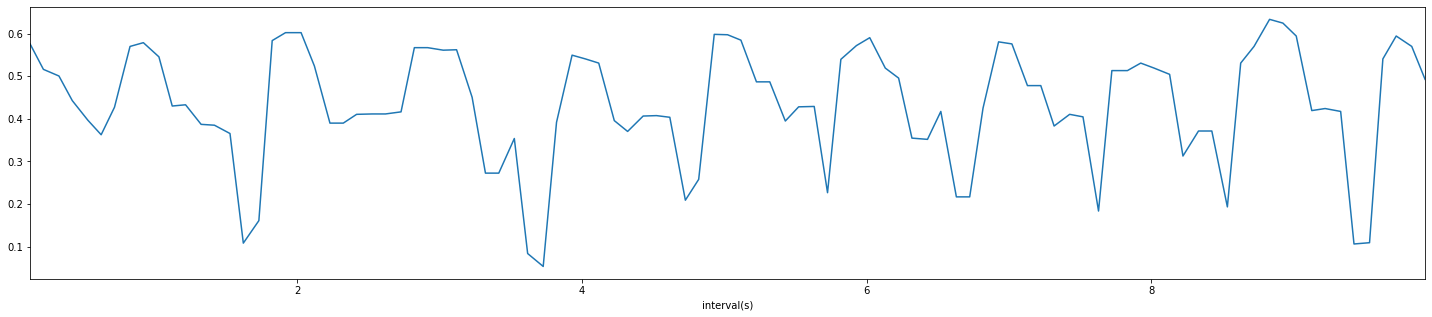

In [21]:
data.loc[:10, 'volt_0'].plot(figsize=(25,5))

In [7]:
data.columns

Index(['timestamp', 'interval(s)', 'volt_0', 'volt_1', 'volt_2', 'volt_3',
       'volt_4', 'volt_5', 'volt_6', 'volt_7', 'volt_8', 'volt_9', 'volt_10',
       'volt_11'],
      dtype='object')